In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [89]:
df = pd.read_csv("../Decision Tree/Breast_Cancer.csv")

In [90]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [91]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [92]:
y = df[['Status']]
x = df.drop(['Status'], axis = 1)

In [93]:
le = LabelEncoder()

In [94]:
y = le.fit_transform(y)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
x = pd.get_dummies(x)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, test_size=.2)

In [97]:
parameter = {
  "criterion" : ['gini', 'entropy', 'log_loss'],
  'splitter' : ['best', 'random'],
  'max_depth' : [3,5,7,9],
  'max_features' : ['auto', 'sqrt', 'log2']
}

In [98]:
DT = DecisionTreeClassifier()
cv = RandomizedSearchCV(DT, param_distributions = parameter, n_iter = 20, cv = 5, random_state = 42, verbose=2,n_jobs=-1)



In [99]:
cv

,estimator,DecisionTreeClassifier()
,param_distributions,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [3, 5, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [100]:
cv.estimator

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [101]:
tree_model = cv.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~

In [102]:
cv.best_estimator_

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [103]:
cv.best_index_

np.int64(7)

In [104]:
cv.best_params_

{'splitter': 'best',
 'max_features': 'log2',
 'max_depth': 5,
 'criterion': 'entropy'}

In [105]:
cv.best_score_

np.float64(0.8782140200728341)

In [106]:
y_pred = tree_model.predict(x_test)

In [107]:
accuracy_score(y_test, y_pred)

0.8683229813664596

In [108]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

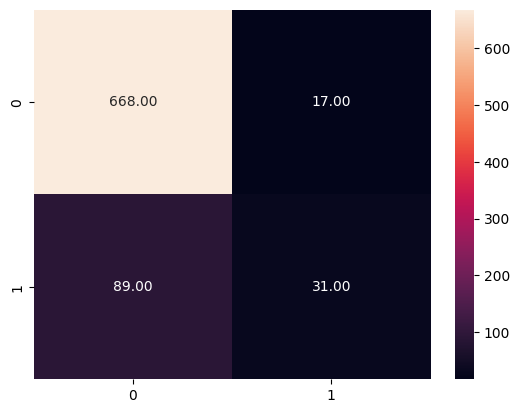

In [109]:
sns.heatmap(cm, annot = True, fmt = '.2f')

In [113]:
pred_proba = tree_model.predict_proba(x_test)[:,1]

In [114]:
auc_score = roc_auc_score(y_test, pred_proba)

In [115]:
auc_score

0.6981386861313869

In [116]:
fpr , tpr , _ = roc_curve(y_test, pred_proba)

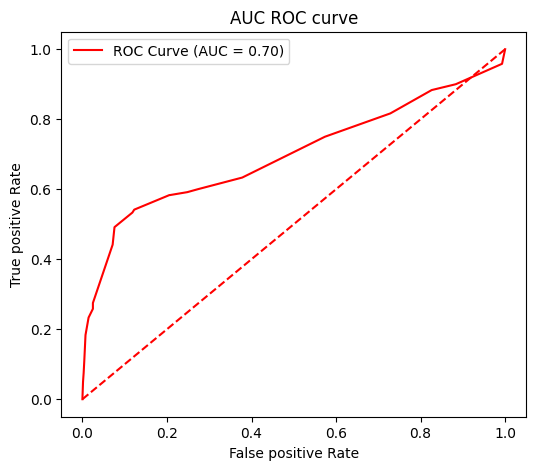

In [118]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color = 'red', label = f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color = 'red', linestyle = '--')
plt.title("AUC ROC curve")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.legend()
plt.show()